# VT1

This is the Script for the VT1 which shall fullfill the following tasks:
- Create Scenarios with given Inputs
- Calculate the Net Present Value for a given Capacity Vector
- Apply a Decision Rule to the Scenarios and calculate a Flexible Capacity Vector
- Calculate the Net Present value for the Flexible Capacity Vector
- Export all the Data to an Excel Sheet

Optional:
- Optimize the Runtime


## Import of Packages

In [35]:
# Import of Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the Functions File
import Functions as fn
import time

# Start of Timer to Measure Runtime
start_time = time.time()

# Import of Excel Data
(General Format of Excel must be Headers followed by columns of Data)

In [36]:
# Reading the Excel File as a Dataframe
df = pd.read_excel("Sample.xlsx")

## Creating Scenarios based on Historic Data
Calculation of Driftrate Mu and Standart Deviation Sigma with Historic Data


In [37]:
# Assign Variables with a Specific Vectors of the Dataframe
Year = np.array(df.iloc[:, 0])
Historic_Demand = np.array(df.iloc[:, 1])
Annual_Change = np.array(df.iloc[:, 2])
Percentage_Change = np.array(df.iloc[:, 3])
Outliner = np.array(df.iloc[:, 4])
# Percentage Change Excluding the Outliners
Percentage_Change1 = np.array(df.iloc[:, 5])

# Caluclation of the Estimated Percentage Drift Rate Mu:
mu = np.nanmean(Percentage_Change1)
print("Mu = ", mu)
# Caluclation of the Estimated Percentage Standart Deviation Sigma:
sigma = np.nanstd(Percentage_Change1)
print("Simga = ", sigma)

Mu =  0.042754330256447565
Simga =  0.05813761525452841


### (Inputs) Definition for Scenarios 

In [38]:
# Demand at t0
Dt0 = Historic_Demand[-1]
# Steptime in Years
dt = 1
# Time Horizon of Forecasts in Steptime
Fth = 20
# Number of Forecasts
Forecasts = 100

Creating a Defined Number of Forecasts and Plotting them

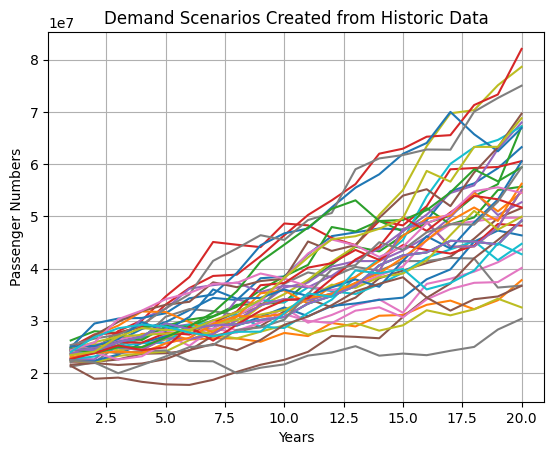

<Figure size 640x480 with 0 Axes>

In [39]:
# Calling the Scenario Creation Function
Scenario = fn.Scenario_creation(mu, sigma, Dt0, dt, Fth, Forecasts)
# Calling the Scenario Plotting Function
fn.Scenario_plot(Scenario, Fth, True, "Demand Scenarios Created from Historic Data")

# Assinging the Scenario as Demand
D = Scenario
# Rounding the Demand in Millions for further Calculations
D_rounded = np.ceil(D / 1000000)

## Exporting Scenario Data
(Mainly used for Programming and Cross Checking with Excel)

In [40]:
# Add Initial Value for the Export
df_export = np.hstack((Dt0 * np.ones((D.shape[0], 1)), D))
# Change the Type to a Pandas Dataframe
df_export_2 = pd.DataFrame(df_export)
# Define Export File Name (If Excel is not found in Folder a new  File is Created)
excel_file = "output.xlsx"
# Fill the Dataframe into the Excel File
df_export_2.to_excel(excel_file, index=False)

## Calculation of the Traditional NPV and ENPV

### (Inputs) NPV Calculation Definiton (These are set as Standart Inputs in Functions)

In [41]:
th = 1000000  # Throughput Capacity per Unit of Capacity
r_D = 0.03  # Revenues per Unit of Demand per Period
r_K = 0.03  # Revenues per Unit of Capacity per Period
r_K_rent = 0.03  # Rental Revenues per Unit of Capacity per Period
co_K = 0.01  # Operational costs per unit of capacity per period
co_D = 0.004  # Operational cost per unit of demand per period
ci_K = 10  # Installation cost per unit of capacity
discount = 0.05  # Discount factor
EoS = 0.85  # EoS factor

### (Input) Definition of a Capacity Vector

In [42]:
# Definition of a Capacity Vector
K_rounded = np.array(
    [25, 25, 25, 25, 30, 30, 30, 30, 30, 40, 40, 40, 40, 40, 50, 50, 50, 50, 50, 50]
)

# Checking the Length of the Capacity Vector
fn.Capacity_Vector_Check(K_rounded, D_rounded)

Capacity Vector Matches the Demand Array Shape


In [43]:
# Calling the NPV Calculation Function
Traditional_NPV = fn.NPV_Calculation_Fix(
    D_rounded,
    K_rounded,
    Fth,
    dt,
    th,
    r_D,
    r_K,
    r_K_rent,
    co_K,
    co_D,
    ci_K,
    discount,
    EoS,
)

print("Traditional NPVs = ", Traditional_NPV)

# Calculating the Traditonal ENPV for the given Capacity Vector
Traditional_ENPV = np.mean(Traditional_NPV)
print("\nTraditional ENPV = ", Traditional_ENPV)

Traditional NPVs =  [ 9519160.35351859 12790810.97801692  4571244.43845058 10723356.08200332
 11827343.39070178 11918771.11112445  9257814.80244588  9764542.8689557
  8197184.34589871 11015793.78251436  9728079.85981885  8235966.42888232
 11343098.60251915  8364289.74557948  9331658.22374227 12062373.2426835
 11240522.90016668 12414836.43933809  7274524.32862019 11294046.77763646
 13739799.34873162  8181141.68644272  7379861.98361819 13502419.62288702
  8750442.06506124  9837384.29954482  7196864.07971545 11820375.89713925
  9553329.50315669 10928575.0224273  12058871.19204205 11821462.35212722
 10269750.69255882  9976505.62858458 12196914.04349404 12484876.05553851
  7669193.40703186 10144683.96172007 12423377.01125323 10592152.83769974
  8550435.2528911  10751842.36271073 13093347.41369181   180151.13338209
 13192209.56533448  9784080.3081063  10024237.87334064  8877498.89127615
 10894074.17634758 11575870.58545146  6640477.54033119 14649262.1348516
 10581017.50937632 11592161.286606

## Creating a Flexible Capacity Vector

In [44]:
# Initial Capacity
K0 = K_rounded[0]
# Capacity Increase in the Excel Sheet
theta_excel = 5
# Calling the Decision Rule for Excel Function to Create a Flexible Capacity Vector
Flexible_Capacity_Excel = fn.Decision_Rule_Excel(D_rounded, K0, theta_excel)

### (Input) Parameters for Decision Rule

In [45]:
# Capacity Theta Vector for Increase of Capacity [4 Integers]
theta_flex = [1, 4, 6, 8]
# Capacity Difference Vector for Comparison  of Capacity [3 Integers]
deltaK = [2, 4, 6]

# Calling the Decision Rule Function to Create a Flexible Capacity Vector
Flexible_Capacity = fn.Decision_Rule(D_rounded, K0, theta_flex, deltaK)

Theta and deltaK match the requirements


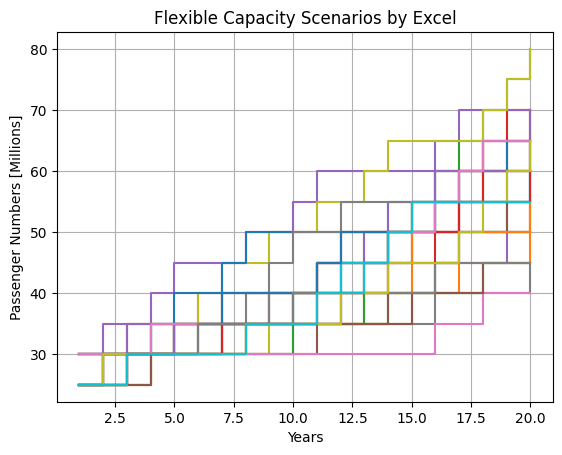

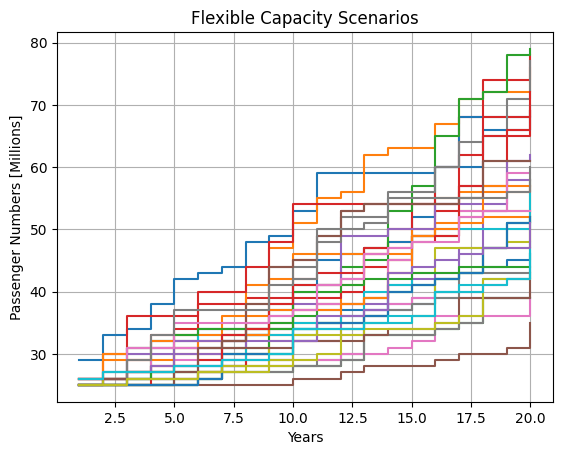

<Figure size 640x480 with 0 Axes>

In [46]:
# Plotting the Flexible Capacity Vectors
fn.Scenario_plot(
    Flexible_Capacity_Excel,
    Fth,
    False,
    "Flexible Capacity Scenarios by Excel",
    "Passenger Numbers [Millions]",
)

fn.Scenario_plot(
    Flexible_Capacity,
    Fth,
    False,
    "Flexible Capacity Scenarios",
    "Passenger Numbers [Millions]",
)

## Calculation of NPV and ENPV using the Flexible Capacity Vector

In [47]:
Flex_NPV_excel = fn.NPV_Calculation_Fix(
    D_rounded,
    Flexible_Capacity_Excel,
    Fth,
    dt,
    th,
    r_D,
    r_K,
    r_K_rent,
    co_K,
    co_D,
    ci_K,
    discount,
    EoS,
)
print("Flexible Excel NPVs = ", Flex_NPV_excel)
# Calculating the ENPV for the Flexible Excel Capacity Vector
Flex_ENPV_excel = np.average(Flex_NPV_excel)
print("\nFlexible Excel ENPV = ", Flex_ENPV_excel)

Flexible Excel NPVs =  [ 9497220.17089717 11729134.10556393  6525435.14051316 10238510.34470076
 11033030.56752007 10765695.62418941  8555161.19463931  9278158.72751269
  8883313.51386976 10482321.79300401  9518741.26613521  8568352.27395184
 10102313.8591297   8873387.3280088   9221184.51828779 11170919.55088324
 10706076.51390262 11592634.49988098  8468050.72992316 10450803.46656107
 12573518.73214527  8545088.36238915  8278372.5018415  12352025.88204297
  9073072.9224201   9498931.02156998  8108841.9178278  10622082.28088856
  9629318.31650822  9927231.89587558 11046787.98688509 10267747.35925699
  9440096.55680319  9208468.31521947 11372790.75353781 11197344.28521559
  8506194.00228353  9599709.20750311 11396500.15123128  9922627.07536579
  8780925.80217546  9748668.27388717 11931755.02258155  3893087.0562631
 11967968.5268749   9469920.01460043  9398392.46755712  8817827.90150329
 10034559.1053918  10634713.86351106  7790426.20332923 13783633.90457974
  9717344.68181687 10940747.8

In [48]:
# Calling the Flexible NPV Calculation Function
Flex_NPV_est = fn.NPV_Calculation_Fix(
    D_rounded,
    Flexible_Capacity,
    Fth,
    dt,
    th,
    r_D,
    r_K,
    r_K_rent,
    co_K,
    co_D,
    ci_K,
    discount,
    EoS,
)
print("Estimated Flexible Excel NPVs = ", Flex_NPV_est)

# Calculating the ENPV for the Estimated Flexible Capacity Vector
Flex_ENPV_est = np.average(Flex_NPV_est)
print("\nEstimated Flexible ENPV = ", Flex_ENPV_est)

Estimated Flexible Excel NPVs =  [ 9888254.82750342 12310699.25347876  6790864.57965579 10806963.06802711
 11546795.42174158 11487782.89249472  9722133.31379774 10316689.16581806
  9476440.38945829 10946963.60259506 10145074.18842527  9391291.40343782
 11057267.10152114  9618514.06595301  9968170.39127175 11764798.1106791
 11230402.67249487 12016620.53355121  8738725.5399798  11181295.28246841
 13302004.97610873  9428421.52819965  9031563.59613837 12927603.41747154
  9659842.50839961 10478799.41398925  8790331.82356361 11446510.12553112
  9976495.97013676 10804661.29004066 11766628.6440634  11160402.33619523
 10557509.71432623 10246849.40308561 11918997.14241598 12083492.23299556
  9069495.41732082 10481392.98940489 12137240.68567007 10617999.24022625
  9578784.4648885  10776209.4011265  12708471.58567978  3893087.0562631
 12673638.95630304 10285674.4532092  10333884.56608795  9661497.13669363
 10756180.16548853 11511978.43202882  8339749.91431042 14097643.46887958
 10600453.07253386 1

## Plotting Target (CDF) Curves
Cumulative Density Function

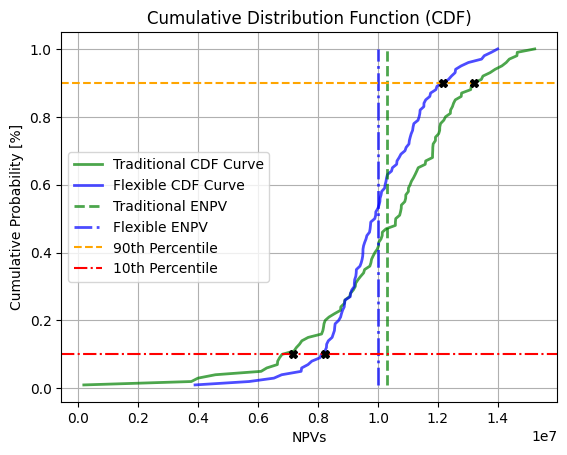

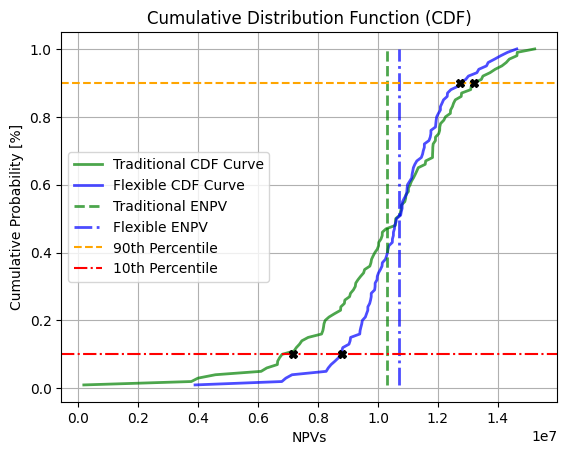

Percentiles (10 and 90) for Traditional + Flexible NPVs = [7156797.648887984, 13217902.552628858, 8217753.543183972, 12171984.800912203]
Percentiles (10 and 90) for Traditional + Flexible Excel NPVs = [7156797.648887984, 13217902.552628858, 8785171.195205227, 12730384.76885896]


In [49]:
# Plotting the CDF for the First Decision Rule
Percentiles = fn.CDF_Plot(Traditional_NPV, Flex_NPV_excel)

# Plotting the CDF for the Second Decision Rule
Percentiles1 = fn.CDF_Plot(Traditional_NPV, Flex_NPV_est)
print("Percentiles (10 and 90) for Traditional + Flexible NPVs =", Percentiles)
print("Percentiles (10 and 90) for Traditional + Flexible Excel NPVs =", Percentiles1)

## Exporting Calculated Data

In [50]:
# # Create a Dictionary
# Exportdata = {
#     "Traditional NPV": Traditional_NPV,
#     "Flexible NPV": Traditional_NPV,
#     "Flexible NPV Excel": Flex_NPV_excel,
#     "Traditional ENPV": Traditional_ENPV,
#     "Flexible ENPV": Flex_ENPV_est,
#     "Flexible ENPV Excel": Flex_ENPV_excel,
# }
# # Create a Pandas Dataframe
# df = pd.DataFrame(Exportdata)

# # Export the Pandas DataFrame to an Excel File
# df.to_excel("NPV_Export.xlsx", index=False)

### Stopping the Runtime

In [51]:
end_time = time.time()

# Calculate the Total Runtime
total_run_time = end_time - start_time

# Display the Total Runtime
print("Total Runtime =", total_run_time)

Total Runtime = 1.0710487365722656
